# Emoji Prediction - ECS 171 Group Project

### Project Overview

Emojis are widely used for modern communication, and offer a way to express emotions visually. Through computer vision and machine learning, the aim of our project is to be able to predict the emoji that best fits a given facial expression. Since there are many available emojis representing different emotions, to keep our project simple and achievable within the given time constraint, we are going to use just a few: Happy, Sad, and Neutral. If time permits, we will move onto more complex emotions: Angry, Disgust, Fear, and Surprise. Our approach is to use a Convolution Neural Network for facial recognition, and we are going to classify these expressions into a category of emotions. From there, we will simply output the emoji that matches that particular emotion. 

### Description of Dataset

The dataset we are using can be found here. 

There are 4,254 observations in the dataset, with 1774 happy observations, 1233 neutral observations, and 1247 sad observations. Each “observation”, or image file, is a 48x48 pixel sized grayscale image of expressions on faces. Sizes are all standardized to 


### Data Exploration

First, we must explore the data.

i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions) Note: For image data you can still describe your data by the number of classes, # of images, size of images, are sizes standardized? do they need to be cropped? normalized? Etc.


In [2]:
# importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.utils import plot_model

In [6]:
train_dir = './archive/train/'
test_dir = './archive/test/'

# image size
row, col = 48, 48
# number of image classes: angry, sad, etc
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       fear  angry  happy   sad  neutral  surprise  disgust
train  4097   3995   7215  4830     4965      3171      436
       sad  angry  neutral  disgust  happy  fear  surprise
test  1247    958     1233      111   1774  1024       831


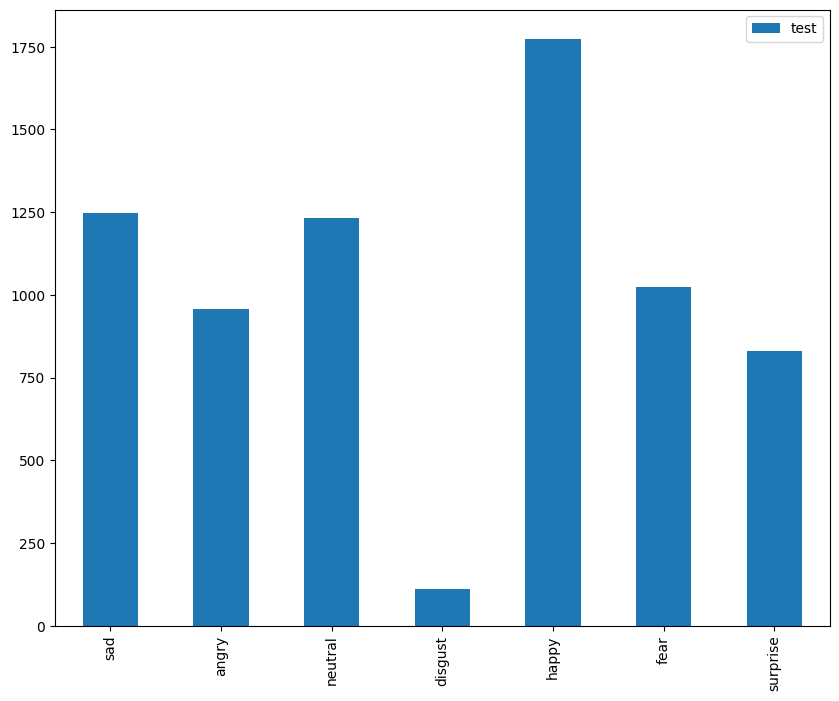

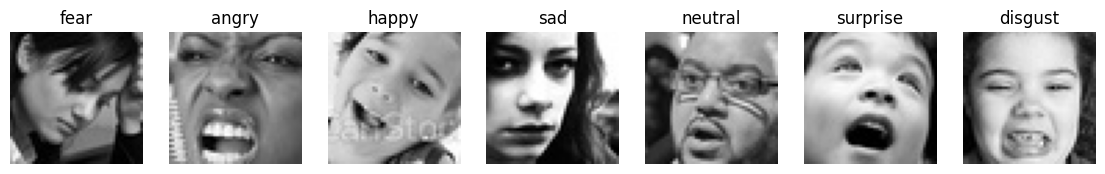

In [8]:
test_count.transpose().plot(kind='bar',figsize=(12, 10))

plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fea492ea-45b1-45bc-9b38-4a1d1d39ebc1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>